In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt 
import os 
from Utils.Read_data import *

In [2]:
path = "DataPaper/"
users = os.listdir(path)

In [3]:
df_rr = create_dataset(users, 'RR')

NO data for actigraph_expanded.csv
NO data for actigraph_intervals.csv
NO data for actigraph_labelled.csv
NO data for activity_rr.csv


In [4]:
df_rr['user'].nunique()

22

In [5]:
df_activity = create_dataset(users, 'activity')

NO data for actigraph_expanded.csv
NO data for actigraph_intervals.csv
NO data for actigraph_labelled.csv
NO data for activity_rr.csv


In [6]:
df_activity['user'].nunique()

22

In [7]:
df_activity

,Activity,Start,End,Day,user
0,2.0,10:00,10:22,1,user_1
1,9.0,10:37,10:40,1,user_1
2,10.0,10:40,10:45,1,user_1
3,6.0,10:55,11:00,1,user_1
4,2.0,11:00,11:20,1,user_1
...,...,...,...,...,...
14,1.0,05:15,05:25,2,user_9
15,NaN,05:25,09:00,2,user_9
16,6.0,11:10,11:20,1,user_9
17,12.0,23:30,23:40,1,user_9


In [8]:
df_rr

,ibi_s,day,time,user
0,0.258,1,10:10:17,user_1
1,0.319,1,10:10:18,user_1
2,0.266,1,10:10:18,user_1
3,0.401,1,10:10:18,user_1
4,1.089,1,10:10:19,user_1
...,...,...,...,...
75245,0.686,-29,09:24:19,user_9
75246,0.673,-29,09:24:20,user_9
75247,0.664,-29,09:24:20,user_9
75248,0.667,-29,09:24:21,user_9


In [9]:
df_rr['time'] = pd.to_datetime(df_rr['time'])

df_activity['Start'] = df_activity['Start'].replace('24:00', '00:00')
df_activity['End'] = df_activity['End'].replace('24:00', '00:00')

df_activity['Start'] = pd.to_datetime(df_activity['Start'])
df_activity['End'] = pd.to_datetime(df_activity['End'])

C:\Users\anisr\AppData\Local\Temp\ipykernel_20780\3628220348.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_rr['time'] = pd.to_datetime(df_rr['time'])
C:\Users\anisr\AppData\Local\Temp\ipykernel_20780\3628220348.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_activity['Start'] = pd.to_datetime(df_activity['Start'])
C:\Users\anisr\AppData\Local\Temp\ipykernel_20780\3628220348.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_activity['End'] = pd.to_datetime(df_activity['End'])


In [10]:
df_activity

,Activity,Start,End,Day,user
0,2.0,2024-12-28 10:00:00,2024-12-28 10:22:00,1,user_1
1,9.0,2024-12-28 10:37:00,2024-12-28 10:40:00,1,user_1
2,10.0,2024-12-28 10:40:00,2024-12-28 10:45:00,1,user_1
3,6.0,2024-12-28 10:55:00,2024-12-28 11:00:00,1,user_1
4,2.0,2024-12-28 11:00:00,2024-12-28 11:20:00,1,user_1
...,...,...,...,...,...
14,1.0,2024-12-28 05:15:00,2024-12-28 05:25:00,2,user_9
15,NaN,2024-12-28 05:25:00,2024-12-28 09:00:00,2,user_9
16,6.0,2024-12-28 11:10:00,2024-12-28 11:20:00,1,user_9
17,12.0,2024-12-28 23:30:00,2024-12-28 23:40:00,1,user_9


In [11]:
df_activity['Start'] = pd.to_datetime(df_activity['Start'], format='%H:%M')
df_activity['End'] = pd.to_datetime(df_activity['End'], format='%H:%M')

df_rr['time'] = pd.to_datetime(df_rr['time'], format='%H:%M:%S')

In [12]:
def get_activity(row):
    if pd.isna(row['time']):
        return None  

    user_activities = df_activity[(df_activity['user'] == row['user']) & (
        df_activity['Day'] == row['day'])]
    for _, activity in user_activities.iterrows():
        if pd.isna(activity['Start']) or pd.isna(activity['End']):
            continue

        if activity['Start'].time() <= row['time'].time() <= activity['End'].time():
            return activity['Activity']

    return None

In [13]:
df_rr['Activity'] = df_rr.apply(get_activity, axis=1)

In [14]:
print(df_activity[['Start', 'End']].dtypes)
print(df_rr['time'].dtype)

Start    datetime64[ns]
End      datetime64[ns]
dtype: object
datetime64[ns]


In [15]:
df_rr['Activity'].nunique()

12

In [16]:
df_activity['Activity'].nunique()

12

In [17]:
df_rr

,ibi_s,day,time,user,Activity
0,0.258,1,2024-12-28 10:10:17,user_1,2.0
1,0.319,1,2024-12-28 10:10:18,user_1,2.0
2,0.266,1,2024-12-28 10:10:18,user_1,2.0
3,0.401,1,2024-12-28 10:10:18,user_1,2.0
4,1.089,1,2024-12-28 10:10:19,user_1,2.0
...,...,...,...,...,...
75245,0.686,-29,2024-12-28 09:24:19,user_9,NaN
75246,0.673,-29,2024-12-28 09:24:20,user_9,NaN
75247,0.664,-29,2024-12-28 09:24:20,user_9,NaN
75248,0.667,-29,2024-12-28 09:24:21,user_9,NaN


In [18]:
df_rr[df_rr['day'].isin([2])]['Activity'].value_counts()

Activity
2.0     24427
3.0     24283
7.0      9582
8.0      9039
12.0     6630
6.0      5833
1.0      4140
5.0      3796
4.0       860
11.0      658
9.0       617
10.0      319
Name: count, dtype: int64

In [19]:
df_rr_2 = df_rr[df_rr['day'].isin([1,2])]

C:\Users\anisr\AppData\Local\Temp\ipykernel_20780\2522109857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rr_2['time_seconds'] = df_rr_2['time'].apply(
C:\Users\anisr\AppData\Local\Temp\ipykernel_20780\2522109857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rr_2['time_radians'] = df_rr_2['time_seconds'] * \
C:\Users\anisr\AppData\Local\Temp\ipykernel_20780\2522109857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

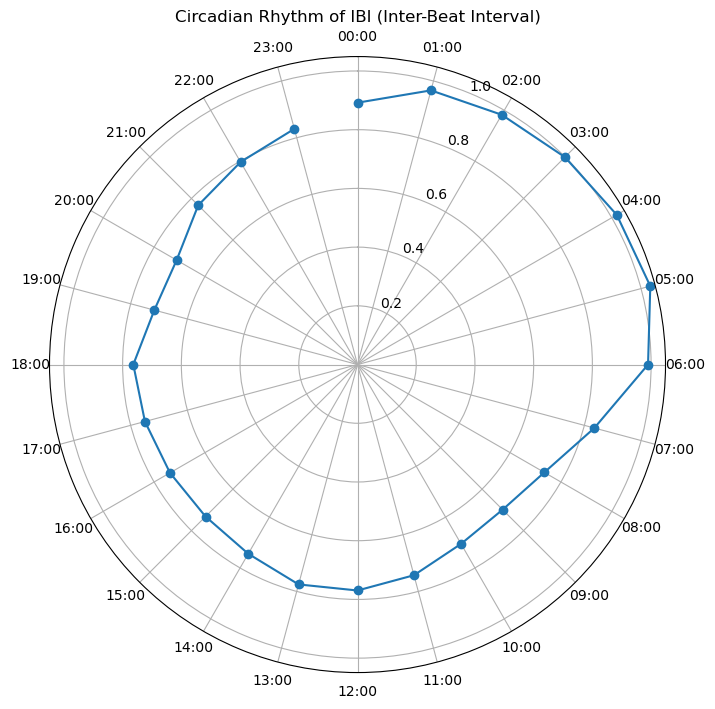

In [20]:
df_rr_2['time_seconds'] = df_rr_2['time'].apply(
    lambda x: x.hour * 3600 + x.minute * 60 + x.second)
df_rr_2['time_radians'] = df_rr_2['time_seconds'] * \
    2 * np.pi / 86400  

df_rr_2['hour'] = df_rr_2['time'].apply(lambda x: x.hour)
hourly_aggregated = df_rr_2.groupby('hour')['ibi_s'].mean().reset_index()

hourly_aggregated['hour_radians'] = hourly_aggregated['hour'] * 2 * np.pi / 24

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(hourly_aggregated['hour_radians'],
        hourly_aggregated['ibi_s'], marker='o', linestyle='-')
ax.set_theta_direction(-1) 
ax.set_theta_offset(np.pi / 2.0) 
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([f"{h:02d}:00" for h in range(24)])
ax.set_title('Circadian Rhythm of IBI (Inter-Beat Interval)')

plt.show()

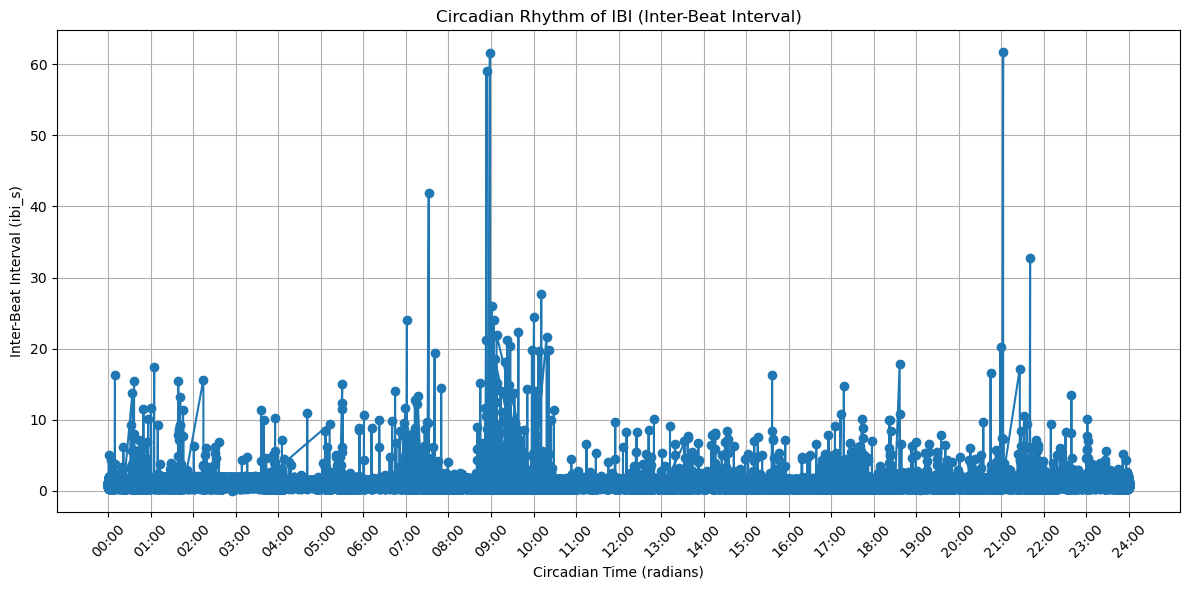

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df_rr_2['time_radians'], df_rr_2['ibi_s'], marker='o', linestyle='-')
plt.xlabel('Circadian Time (radians)')
plt.ylabel('Inter-Beat Interval (ibi_s)')
plt.title('Circadian Rhythm of IBI (Inter-Beat Interval)')

xticks = np.linspace(0, 2*np.pi, 25)
xtick_labels = [f"{int(h):02d}:00" for h in np.linspace(0, 24, 25)]
plt.xticks(xticks, xtick_labels, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df_rr_2

,ibi_s,day,time,user,Activity,time_seconds,time_radians,hour
0,0.258,1,2024-12-28 10:10:17,user_1,2.0,36617,2.662863,10
1,0.319,1,2024-12-28 10:10:18,user_1,2.0,36618,2.662936,10
2,0.266,1,2024-12-28 10:10:18,user_1,2.0,36618,2.662936,10
3,0.401,1,2024-12-28 10:10:18,user_1,2.0,36618,2.662936,10
4,1.089,1,2024-12-28 10:10:19,user_1,2.0,36619,2.663009,10
...,...,...,...,...,...,...,...,...
51080,0.884,1,2024-12-28 23:59:56,user_9,NaN,86396,6.282894,23
51081,0.897,1,2024-12-28 23:59:57,user_9,NaN,86397,6.282967,23
51082,0.901,1,2024-12-28 23:59:58,user_9,NaN,86398,6.283040,23
51083,0.854,1,2024-12-28 23:59:59,user_9,NaN,86399,6.283113,23


In [23]:
import scipy
from sklearn.metrics import r2_score


def fit_sin(tt, yy, plot=False):
    tt = np.array(tt)
    yy = np.array(yy)
    freq = 24 * 3600  
    guess_amp = np.std(yy) * 2. ** 0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2. * np.pi * freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):
        return A * np.sin((t / freq) * 2 * np.pi + p) + c

    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w / (2. * np.pi)

    def fitfunc(t): return A * np.sin((t / freq) * 2 * np.pi + p) + c

    coefficient_of_determination = r2_score(yy, fitfunc(tt))
    acrophase_time = pd.DataFrame([[x, y] for x, y in zip(
        tt, fitfunc(tt))], columns=['t', 'val']).set_index('t')
    acrophase_timestamp = acrophase_time[acrophase_time.val == acrophase_time.max(
    ).values[0]].index[0]

    res = {
        "amp": abs(A),
        "phase": p,
        "APhase": acrophase_timestamp,
        "offset": c,
        "r2": coefficient_of_determination,
        "tt": tt,
        'ff': fitfunc(tt)
    }

    if plot:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(tt, yy, "-k", linewidth=1, alpha=0.3, label='Original Data')
        ax.plot(fitfunc(tt), "r--", label="Circadian Rhythm", linewidth=1)
        plt.xlabel('Time (seconds since midnight)')
        plt.ylabel('Heart Rate')
        plt.title('Circadian Rhythm ')
        plt.ylim(0,max(yy)+10)
        max_time = max(tt)
        tick_positions = np.arange(0, max_time + 1, 3600 * 2)
        tick_labels = ['12 AM', '2 AM', '4 AM', '6 AM', '8 AM', '10 AM', '12 PM', '2 PM', '4 PM', '6 PM', '8 PM', '10 PM', '12 AM'][:len(tick_positions)]

        plt.xticks(tick_positions, tick_labels, rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return res

In [24]:
df_rr_2['ibi_s'] = [x if x < 2 else np.nan for x in df_rr_2['ibi_s']]
df_rr_2['ibi_s'] = [x if x > 0.3 else np.nan for x in df_rr_2['ibi_s']]

C:\Users\anisr\AppData\Local\Temp\ipykernel_20780\3549365200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rr_2['ibi_s'] = [x if x < 2 else np.nan for x in df_rr_2['ibi_s']]
C:\Users\anisr\AppData\Local\Temp\ipykernel_20780\3549365200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rr_2['ibi_s'] = [x if x > 0.3 else np.nan for x in df_rr_2['ibi_s']]


In [25]:
df_rr_2['hr'] = [60/x for x in df_rr_2['ibi_s']]

C:\Users\anisr\AppData\Local\Temp\ipykernel_20780\3101165557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rr_2['hr'] = [60/x for x in df_rr_2['ibi_s']]


In [26]:
sample_user = df_rr_2[df_rr_2['user']=='user_1'].dropna(axis=0, subset=['hr'])

In [27]:
sample_user = sample_user[sample_user['day'].isin([1,2])]

C:\Users\anisr\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


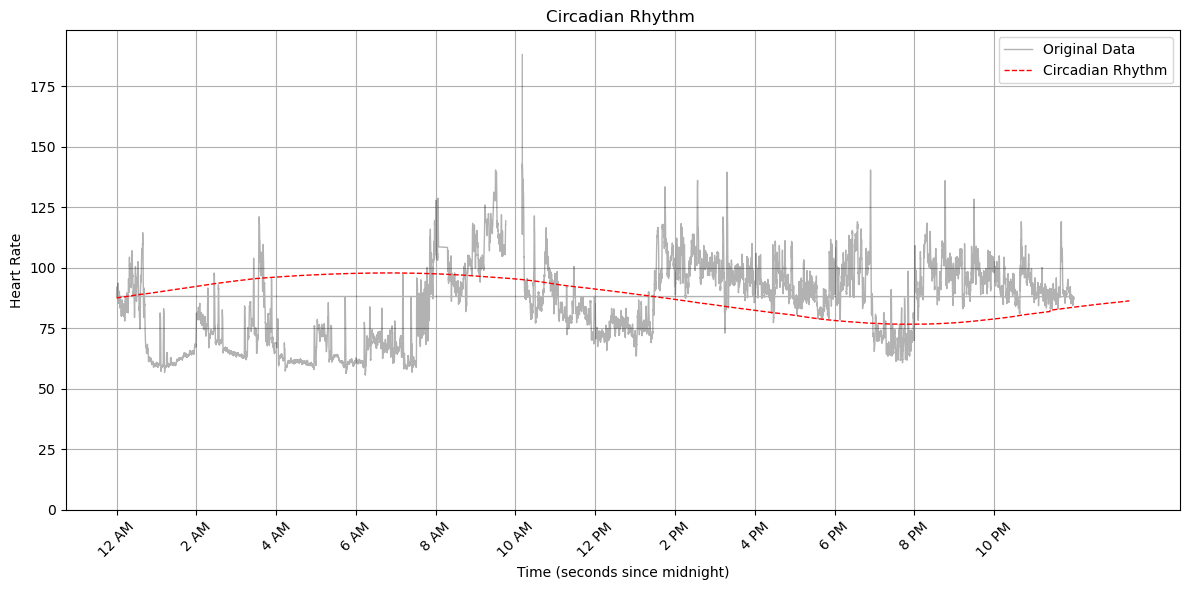

In [28]:
result = fit_sin(sample_user['time_seconds'],
                 sample_user['hr'].rolling(60,min_periods=1).mean(), plot=True)

In [29]:
df_rr_2 = df_rr_2.dropna(axis=0)

In [30]:
df_rr_2

,ibi_s,day,time,user,Activity,time_seconds,time_radians,hour,hr
1,0.319,1,2024-12-28 10:10:18,user_1,2.0,36618,2.662936,10,188.087774
3,0.401,1,2024-12-28 10:10:18,user_1,2.0,36618,2.662936,10,149.625935
4,1.089,1,2024-12-28 10:10:19,user_1,2.0,36619,2.663009,10,55.096419
5,0.752,1,2024-12-28 10:10:20,user_1,2.0,36620,2.663082,10,79.787234
6,0.337,1,2024-12-28 10:10:20,user_1,2.0,36620,2.663082,10,178.041543
...,...,...,...,...,...,...,...,...,...
50319,0.525,1,2024-12-28 23:49:58,user_9,3.0,85798,6.239407,23,114.285714
50320,0.541,1,2024-12-28 23:49:59,user_9,3.0,85799,6.239479,23,110.905730
50321,0.567,1,2024-12-28 23:49:59,user_9,3.0,85799,6.239479,23,105.820106
50322,0.586,1,2024-12-28 23:50:00,user_9,3.0,85800,6.239552,23,102.389078


In [3]:
df_saliva = create_dataset(users, 'saliva')

NO data for actigraph_expanded.csv
NO data for actigraph_intervals.csv
NO data for actigraph_labelled.csv
NO data for activity_rr.csv
NO data for df_rr_2_activity.csv
NO data for user_21


In [4]:
df_saliva['user'].nunique()

21

In [5]:
df_rr_2 = pd.read_csv('DataPaper/df_rr_2_activity.csv')

In [8]:
df_rr_2.to_csv("DataPaper/df_rr_2_activity.csv",index=False)

In [6]:
df_sleep = create_dataset(users, 'sleep')
df_sleep['user'].nunique()

NO data for actigraph_expanded.csv
NO data for actigraph_intervals.csv
NO data for actigraph_labelled.csv
NO data for activity_rr.csv
NO data for df_rr_2_activity.csv


21

In [7]:
df_sleep.iloc[1, df_sleep.columns.get_loc('user')] = 'user_11'

In [8]:
from datetime import datetime, timedelta

In [9]:
df_sleep['Onset DateTime'] = pd.to_datetime(
    '2024-12-28') + pd.to_timedelta(df_sleep['In Bed Time'] + ':00')
df_sleep['Out Bed DateTime'] = pd.to_datetime(
    '2024-12-28') + pd.to_timedelta(df_sleep['Out Bed Time'] + ':00')
df_sleep.loc[df_sleep['Out Bed Date'] == 1,
             'Out Bed DateTime'] += timedelta(days=1)

In [10]:
df_saliva_pivot = df_saliva.pivot(index='user', columns='SAMPLES', values=[
                                  'Cortisol NORM', 'Melatonin NORM'])

df_saliva_pivot.columns = ['_'.join(col).strip()
                           for col in df_saliva_pivot.columns.values]

df_saliva_pivot.reset_index(inplace=True)

df_saliva_pivot.columns = ['user', 'Cortisol_before_sleep',
                           'Cortisol_wake_up', 'Melatonin_before_sleep', 'Melatonin_wake_up']

In [11]:
df_saliva_pivot

,user,Cortisol_before_sleep,Cortisol_wake_up,Melatonin_before_sleep,Melatonin_wake_up
0,user_1,0.034137,0.077939,1.738385e-08,6.747893e-09
1,user_10,0.037046,0.019659,8.669611e-09,2.573795e-09
2,user_11,0.040592,0.015572,2.038077e-09,9.653476e-09
3,user_12,0.155777,0.145431,3.542804e-09,8.639988e-09
4,user_13,0.012278,0.034191,1.902268e-09,2.295933e-09
5,user_14,0.015788,0.039235,6.110973e-09,4.255579e-09
6,user_15,0.020579,0.042939,2.607041e-09,1.194220e-09
7,user_16,0.019456,0.042941,6.923590e-09,NaN
8,user_17,0.018304,0.095269,4.379331e-09,1.529949e-08
9,user_18,0.015166,0.068494,1.384661e-08,5.730512e-09


In [12]:
df_combined = pd.merge(df_rr_2, df_saliva_pivot, on='user')

In [13]:
df_combined

,ibi_s,day,time,user,Activity,time_seconds,time_radians,hour,hr,Cortisol_before_sleep,Cortisol_wake_up,Melatonin_before_sleep,Melatonin_wake_up
0,0.319,1,2024-12-28 10:10:18,user_1,2.0,36618,2.662936,10,188.087774,0.034137,0.077939,1.738385e-08,6.747893e-09
1,0.401,1,2024-12-28 10:10:18,user_1,2.0,36618,2.662936,10,149.625935,0.034137,0.077939,1.738385e-08,6.747893e-09
2,1.089,1,2024-12-28 10:10:19,user_1,2.0,36619,2.663009,10,55.096419,0.034137,0.077939,1.738385e-08,6.747893e-09
3,0.752,1,2024-12-28 10:10:20,user_1,2.0,36620,2.663082,10,79.787234,0.034137,0.077939,1.738385e-08,6.747893e-09
4,0.337,1,2024-12-28 10:10:20,user_1,2.0,36620,2.663082,10,178.041543,0.034137,0.077939,1.738385e-08,6.747893e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869695,0.525,1,2024-12-28 23:49:58,user_9,3.0,85798,6.239407,23,114.285714,0.025968,0.080560,5.593342e-09,7.385992e-09
869696,0.541,1,2024-12-28 23:49:59,user_9,3.0,85799,6.239479,23,110.905730,0.025968,0.080560,5.593342e-09,7.385992e-09
869697,0.567,1,2024-12-28 23:49:59,user_9,3.0,85799,6.239479,23,105.820106,0.025968,0.080560,5.593342e-09,7.385992e-09
869698,0.586,1,2024-12-28 23:50:00,user_9,3.0,85800,6.239552,23,102.389078,0.025968,0.080560,5.593342e-09,7.385992e-09


In [14]:
df_questionnaire = create_dataset(users, 'questionnaire')

NO data for actigraph_expanded.csv
NO data for actigraph_intervals.csv
NO data for actigraph_labelled.csv
NO data for activity_rr.csv
NO data for df_rr_2_activity.csv


In [20]:
df_q = df_questionnaire[['STAI1', 'STAI2','Pittsburgh','user']]

In [23]:
df_final = pd.merge(df_combined, df_q, on='user')

In [26]:
df_final

,ibi_s,day,time,user,Activity,time_seconds,time_radians,hour,hr,Cortisol_before_sleep,Cortisol_wake_up,Melatonin_before_sleep,Melatonin_wake_up,STAI1,STAI2,Pittsburgh
0,0.319,1,2024-12-28 10:10:18,user_1,2.0,36618,2.662936,10,188.087774,0.034137,0.077939,1.738385e-08,6.747893e-09,41.0,43.0,5.0
1,0.401,1,2024-12-28 10:10:18,user_1,2.0,36618,2.662936,10,149.625935,0.034137,0.077939,1.738385e-08,6.747893e-09,41.0,43.0,5.0
2,1.089,1,2024-12-28 10:10:19,user_1,2.0,36619,2.663009,10,55.096419,0.034137,0.077939,1.738385e-08,6.747893e-09,41.0,43.0,5.0
3,0.752,1,2024-12-28 10:10:20,user_1,2.0,36620,2.663082,10,79.787234,0.034137,0.077939,1.738385e-08,6.747893e-09,41.0,43.0,5.0
4,0.337,1,2024-12-28 10:10:20,user_1,2.0,36620,2.663082,10,178.041543,0.034137,0.077939,1.738385e-08,6.747893e-09,41.0,43.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869695,0.525,1,2024-12-28 23:49:58,user_9,3.0,85798,6.239407,23,114.285714,0.025968,0.080560,5.593342e-09,7.385992e-09,36.0,41.0,9.0
869696,0.541,1,2024-12-28 23:49:59,user_9,3.0,85799,6.239479,23,110.905730,0.025968,0.080560,5.593342e-09,7.385992e-09,36.0,41.0,9.0
869697,0.567,1,2024-12-28 23:49:59,user_9,3.0,85799,6.239479,23,105.820106,0.025968,0.080560,5.593342e-09,7.385992e-09,36.0,41.0,9.0
869698,0.586,1,2024-12-28 23:50:00,user_9,3.0,85800,6.239552,23,102.389078,0.025968,0.080560,5.593342e-09,7.385992e-09,36.0,41.0,9.0


In [29]:
df_sleep.head()

,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index,user,Onset DateTime,Out Bed DateTime
0,2,00:46,2,03:31,2,00:46,NaN,87.27,165,144,21,9,2.33,9.091,10.000,19.091,user_1,2024-12-28 00:46:00,2024-12-28 03:31:00
1,2,03:57,2,07:30,2,03:57,NaN,92.02,213,196,17,9,1.89,8.920,NaN,8.920,user_11,2024-12-28 03:57:00,2024-12-28 07:30:00
0,2,02:40,2,08:09,2,02:44,4.0,75.08,329,247,78,13,6.00,20.669,7.692,28.361,user_10,2024-12-28 02:40:00,2024-12-28 08:09:00
0,2,00:32,2,06:36,2,00:32,NaN,94.23,364,343,21,12,1.75,9.066,15.385,24.451,user_12,2024-12-28 00:32:00,2024-12-28 06:36:00
0,1,23:41,1,05:04,1,23:41,NaN,76.47,323,247,76,19,4.00,17.957,15.789,33.746,user_13,2024-12-28 23:41:00,2024-12-29 05:04:00


In [82]:
df = pd.merge(df_final, df_sleep[['Efficiency','Total Sleep Time (TST)','Wake After Sleep Onset (WASO)','Number of Awakenings','user']], on='user')

In [83]:
df = df.drop(['time'],axis=1)

In [62]:
df[(df['STAI1'] > 32) & (df['STAI1']<=49)]['user'].unique()

array(['user_1', 'user_10', 'user_11', 'user_14', 'user_17', 'user_18',
       'user_20', 'user_22', 'user_7', 'user_9'], dtype=object)

In [63]:
df[(df['STAI1'] > 50)]['user'].unique()

array(['user_15', 'user_5'], dtype=object)

In [67]:
df[(df['STAI2'] < 43)]['user'].unique()

array(['user_12', 'user_15', 'user_16', 'user_19', 'user_2', 'user_20',
       'user_3', 'user_4', 'user_8', 'user_9'], dtype=object)

In [68]:
df[(df['STAI2'] > 43)]['user'].unique()

array(['user_10', 'user_14', 'user_17', 'user_18', 'user_22', 'user_5',
       'user_6'], dtype=object)

In [75]:
df[(df['STAI1'] <= 31)]['user'].unique()

array(['user_12', 'user_13', 'user_16', 'user_19', 'user_2', 'user_3',
       'user_4'], dtype=object)

In [77]:
df[(df['STAI1'] >32) & (df['STAI1']<49)]['user'].unique()

array(['user_1', 'user_10', 'user_11', 'user_14', 'user_17', 'user_18',
       'user_20', 'user_22', 'user_7', 'user_9'], dtype=object)

In [78]:
state_anxiety_threshold_low = 31
state_anxiety_threshold_high = 49
trait_anxiety_threshold = 43


def categorize_anxiety(row):
    if row['STAI1'] <= state_anxiety_threshold_low and row['STAI2'] < trait_anxiety_threshold:
        return 'low_state_anxiety, low_trait_anxiety'
    elif row['STAI1'] <= state_anxiety_threshold_low and row['STAI2'] >= trait_anxiety_threshold:
        return 'low_state_anxiety, high_trait_anxiety'
    elif state_anxiety_threshold_low < row['STAI1'] < state_anxiety_threshold_high and row['STAI2'] < trait_anxiety_threshold:
        return 'high_state_anxiety, low_trait_anxiety'
    elif state_anxiety_threshold_low < row['STAI1'] < state_anxiety_threshold_high and row['STAI2'] >= trait_anxiety_threshold:
        return 'high_state_anxiety, high_trait_anxiety'
    else:
        return 'other'  


df['Anxiety_Group'] = df.apply(categorize_anxiety, axis=1)

print(df[['STAI1', 'STAI2', 'Anxiety_Group']])

        STAI1  STAI2                           Anxiety_Group
0        41.0   43.0  high_state_anxiety, high_trait_anxiety
1        41.0   43.0  high_state_anxiety, high_trait_anxiety
2        41.0   43.0  high_state_anxiety, high_trait_anxiety
3        41.0   43.0  high_state_anxiety, high_trait_anxiety
4        41.0   43.0  high_state_anxiety, high_trait_anxiety
...       ...    ...                                     ...
869695   36.0   41.0   high_state_anxiety, low_trait_anxiety
869696   36.0   41.0   high_state_anxiety, low_trait_anxiety
869697   36.0   41.0   high_state_anxiety, low_trait_anxiety
869698   36.0   41.0   high_state_anxiety, low_trait_anxiety
869699   36.0   41.0   high_state_anxiety, low_trait_anxiety

[869700 rows x 3 columns]


In [80]:
df['Anxiety_Group'].value_counts()

Anxiety_Group
high_state_anxiety, high_trait_anxiety    359660
low_state_anxiety, low_trait_anxiety      232865
other                                     124351
high_state_anxiety, low_trait_anxiety     104829
low_state_anxiety, high_trait_anxiety      47995
Name: count, dtype: int64

In [81]:
low_state_low_trait = df[df['Anxiety_Group'] ==
                         'low_state_anxiety, low_trait_anxiety']['user'].unique()
low_state_high_trait = df[df['Anxiety_Group'] ==
                          'low_state_anxiety, high_trait_anxiety']['user'].unique()
high_state_low_trait = df[df['Anxiety_Group'] ==
                          'high_state_anxiety, low_trait_anxiety']['user'].unique()
high_state_high_trait = df[df['Anxiety_Group'] ==
                           'high_state_anxiety, high_trait_anxiety']['user'].unique()

print("Low State Anxiety, Low Trait Anxiety:")
print(low_state_low_trait)

print("Low State Anxiety, High Trait Anxiety:")
print(low_state_high_trait)

print("High State Anxiety, Low Trait Anxiety:")
print(high_state_low_trait)

print("High State Anxiety, High Trait Anxiety:")
print(high_state_high_trait)

Low State Anxiety, Low Trait Anxiety:
['user_12' 'user_16' 'user_19' 'user_2' 'user_3' 'user_4']
Low State Anxiety, High Trait Anxiety:
['user_13']
High State Anxiety, Low Trait Anxiety:
['user_20' 'user_8' 'user_9']
High State Anxiety, High Trait Anxiety:
['user_1' 'user_10' 'user_11' 'user_14' 'user_17' 'user_18' 'user_22'
 'user_6']


In [85]:
low_state_anxiety = df[df['STAI1'] <= 31]
high_state_anxiety = df[(df['STAI1'] > 31) & (df['STAI1'] < 49)]
low_trait_anxiety = df[df['STAI2'] < 43]
high_trait_anxiety = df[df['STAI2'] >= 43]

In [86]:
print("Low State Anxiety Users:")
print(low_state_anxiety['user'].unique())

print("High State Anxiety Users:")
print(high_state_anxiety['user'].unique())

print("Low Trait Anxiety Users:")
print(low_trait_anxiety['user'].unique())

print("High Trait Anxiety Users:")
print(high_trait_anxiety['user'].unique())



Low State Anxiety Users:
['user_12' 'user_13' 'user_16' 'user_19' 'user_2' 'user_3' 'user_4']
High State Anxiety Users:
['user_1' 'user_10' 'user_11' 'user_14' 'user_17' 'user_18' 'user_20'
 'user_22' 'user_6' 'user_7' 'user_8' 'user_9']
Low Trait Anxiety Users:
['user_12' 'user_15' 'user_16' 'user_19' 'user_2' 'user_20' 'user_3'
 'user_4' 'user_8' 'user_9']
High Trait Anxiety Users:
['user_1' 'user_10' 'user_11' 'user_13' 'user_14' 'user_17' 'user_18'
 'user_22' 'user_5' 'user_6']


In [89]:
low_state_anxiety['class'] = 'low_state_anxiety'
high_state_anxiety['class'] = 'high_state_anxiety'
low_trait_anxiety['class'] = 'low_trait_anxiety'
high_trait_anxiety['class'] = 'high_trait_anxiety'

C:\Users\anisr\AppData\Local\Temp\ipykernel_5580\818951200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_state_anxiety['class'] = 'low_state_anxiety'
C:\Users\anisr\AppData\Local\Temp\ipykernel_5580\818951200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_state_anxiety['class'] = 'high_state_anxiety'
C:\Users\anisr\AppData\Local\Temp\ipykernel_5580\818951200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [90]:
group1 = pd.concat([low_state_anxiety, high_state_anxiety])
group2 = pd.concat([low_trait_anxiety, high_trait_anxiety])

In [92]:
group1['class'].value_counts()

class
high_state_anxiety    518228
low_state_anxiety     280860
Name: count, dtype: int64

In [93]:
group2['class'].value_counts()

class
high_trait_anxiety    436235
low_trait_anxiety     379726
Name: count, dtype: int64

In [94]:
group1.to_csv('DataPaper/group1.csv',index=False)
group2.to_csv('DataPaper/group2.csv',index=False)